In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objs as go
import plotly.express as plx

In [38]:
cc=pd.read_csv(r"../BankChurners.csv")

In [39]:
data = cc.drop(columns=[
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
], errors='ignore')



In [40]:
#Exploring the Data¶


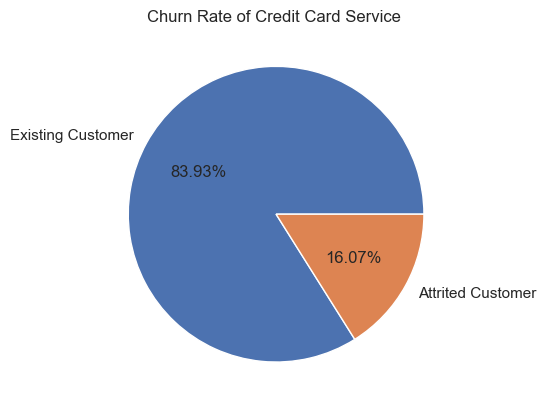

In [9]:
# presentase Churn rate Credite card service
plt.title('Churn Rate of Credit Card Service ')
plt.pie(data['Attrition_Flag'].value_counts(), labels=data['Attrition_Flag'].value_counts().index, autopct='%1.2f%%')
plt.show()

In [10]:
##Identify the Data¶

In [11]:
numerical_columns = ["Customer_Age", 
                     "Months_on_book", 
                     "Credit_Limit", 
                     "Total_Revolving_Bal", 
                     "Avg_Open_To_Buy", 
                     "Total_Amt_Chng_Q4_Q1", 
                     "Total_Trans_Amt", 
                     "Total_Trans_Ct", 
                     "Total_Ct_Chng_Q4_Q1", 
                     "Avg_Utilization_Ratio"]

categorical_columns = ['Attrition_Flag',
                       'Gender',
                       'Education_Level',
                       'Marital_Status',
                       'Income_Category',
                       'Card_Category']

discrete_columns = ['CLIENTNUM',
                    'Dependent_count',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon']

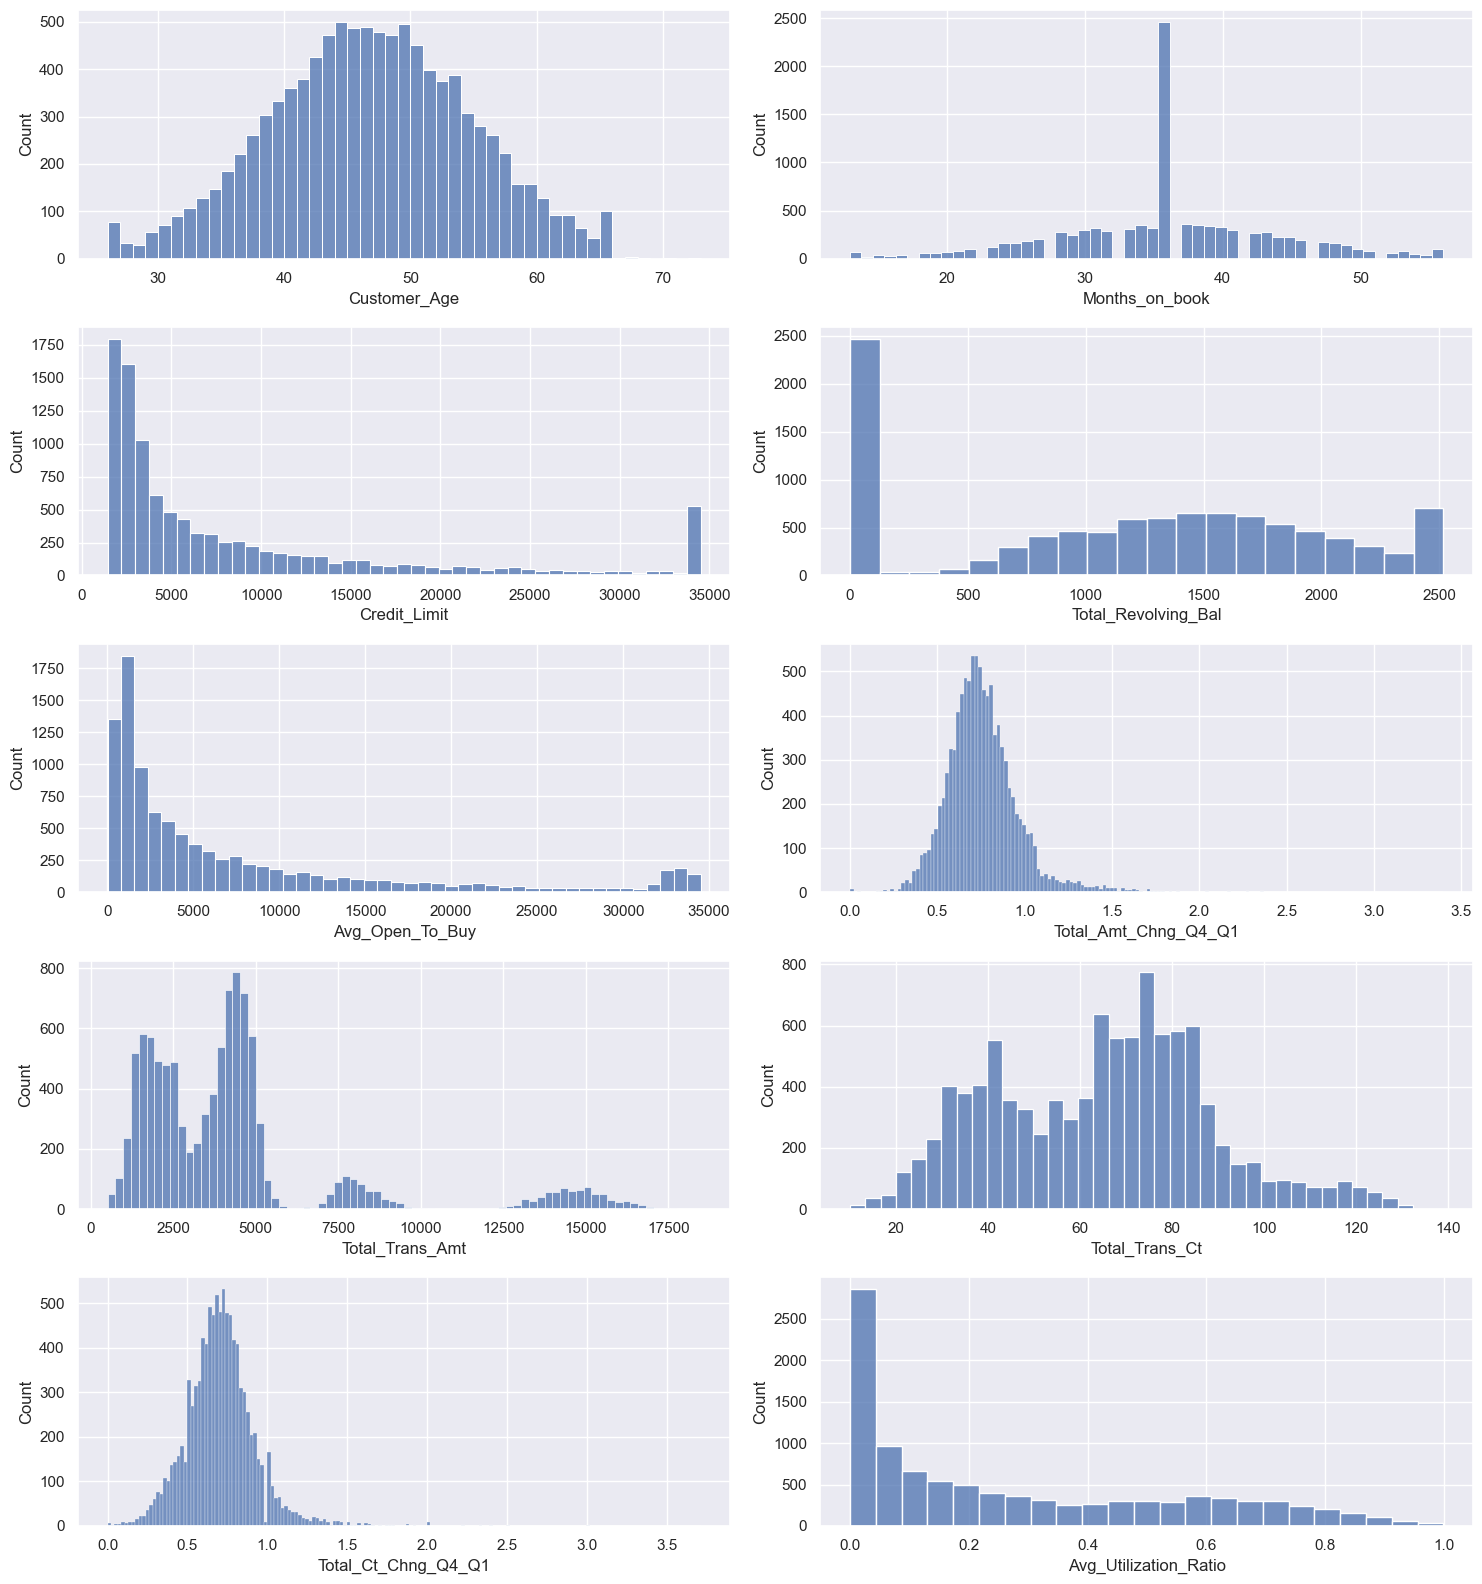

In [12]:
# Numerical Value 
fig, axes = plt.subplots(5,2, figsize=(15,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
  plot = sns.histplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

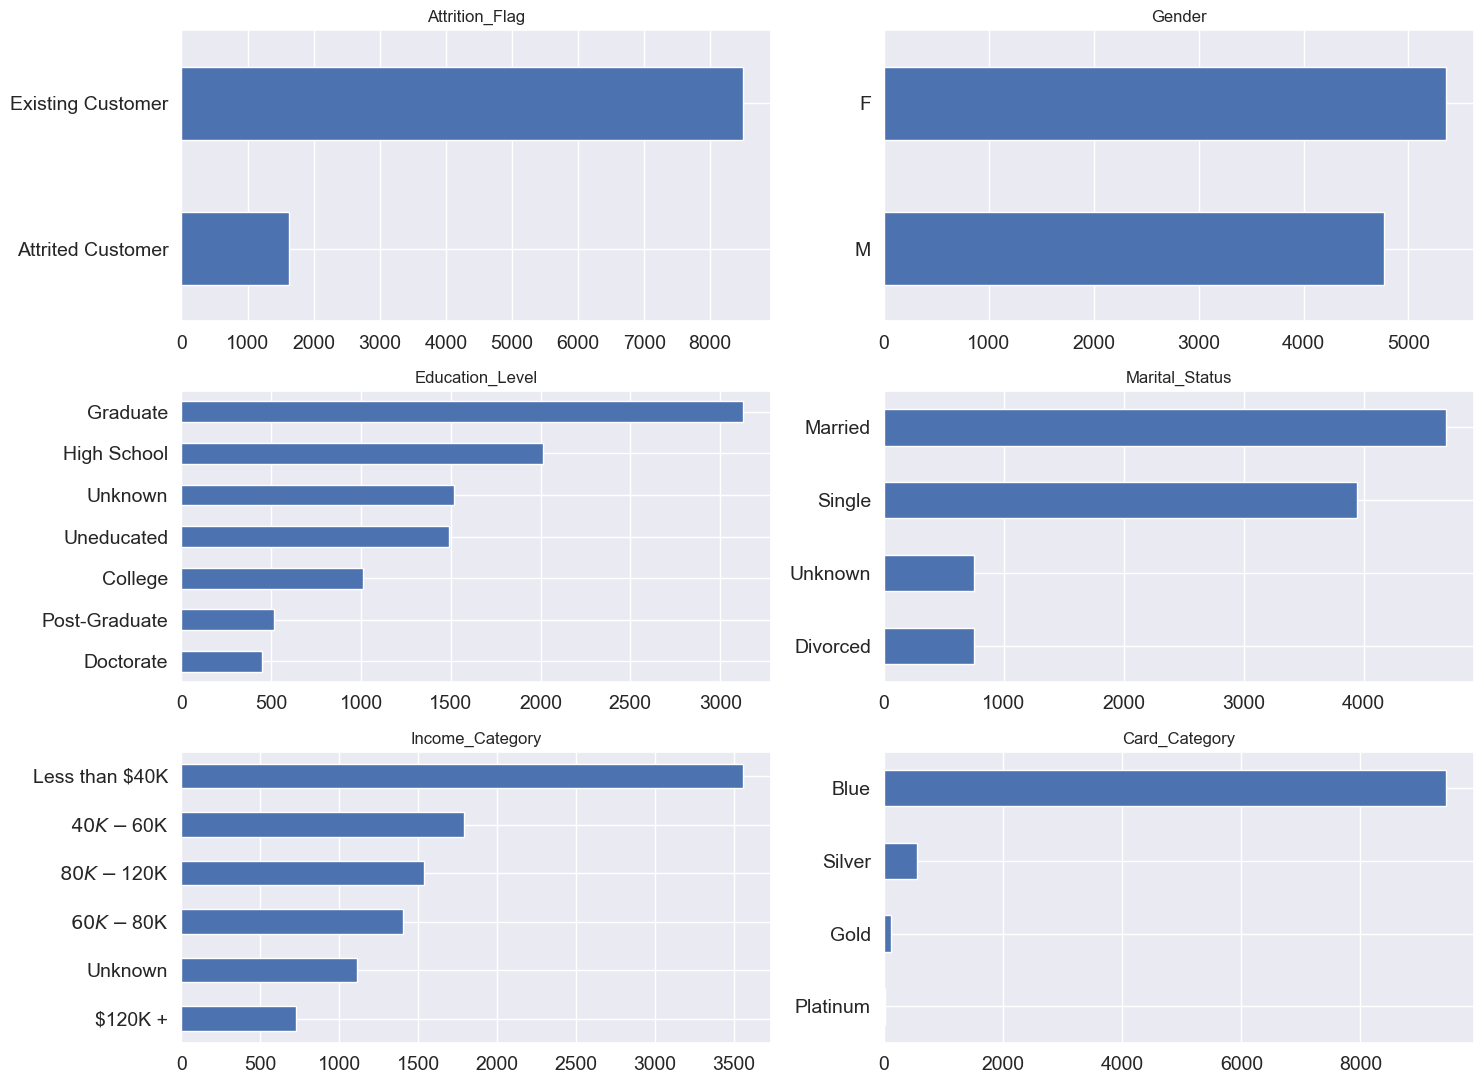

In [13]:
# Categorical Value
fig, axes = plt.subplots(3,2, figsize=(15,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(categorical_columns):
  data[col].value_counts()[::-1].plot(kind='barh',ax=axes[i], title=col, fontsize=14)
  axes[i].set_ylabel('')
plt.tight_layout()

In [14]:
##Analyze the Data¶

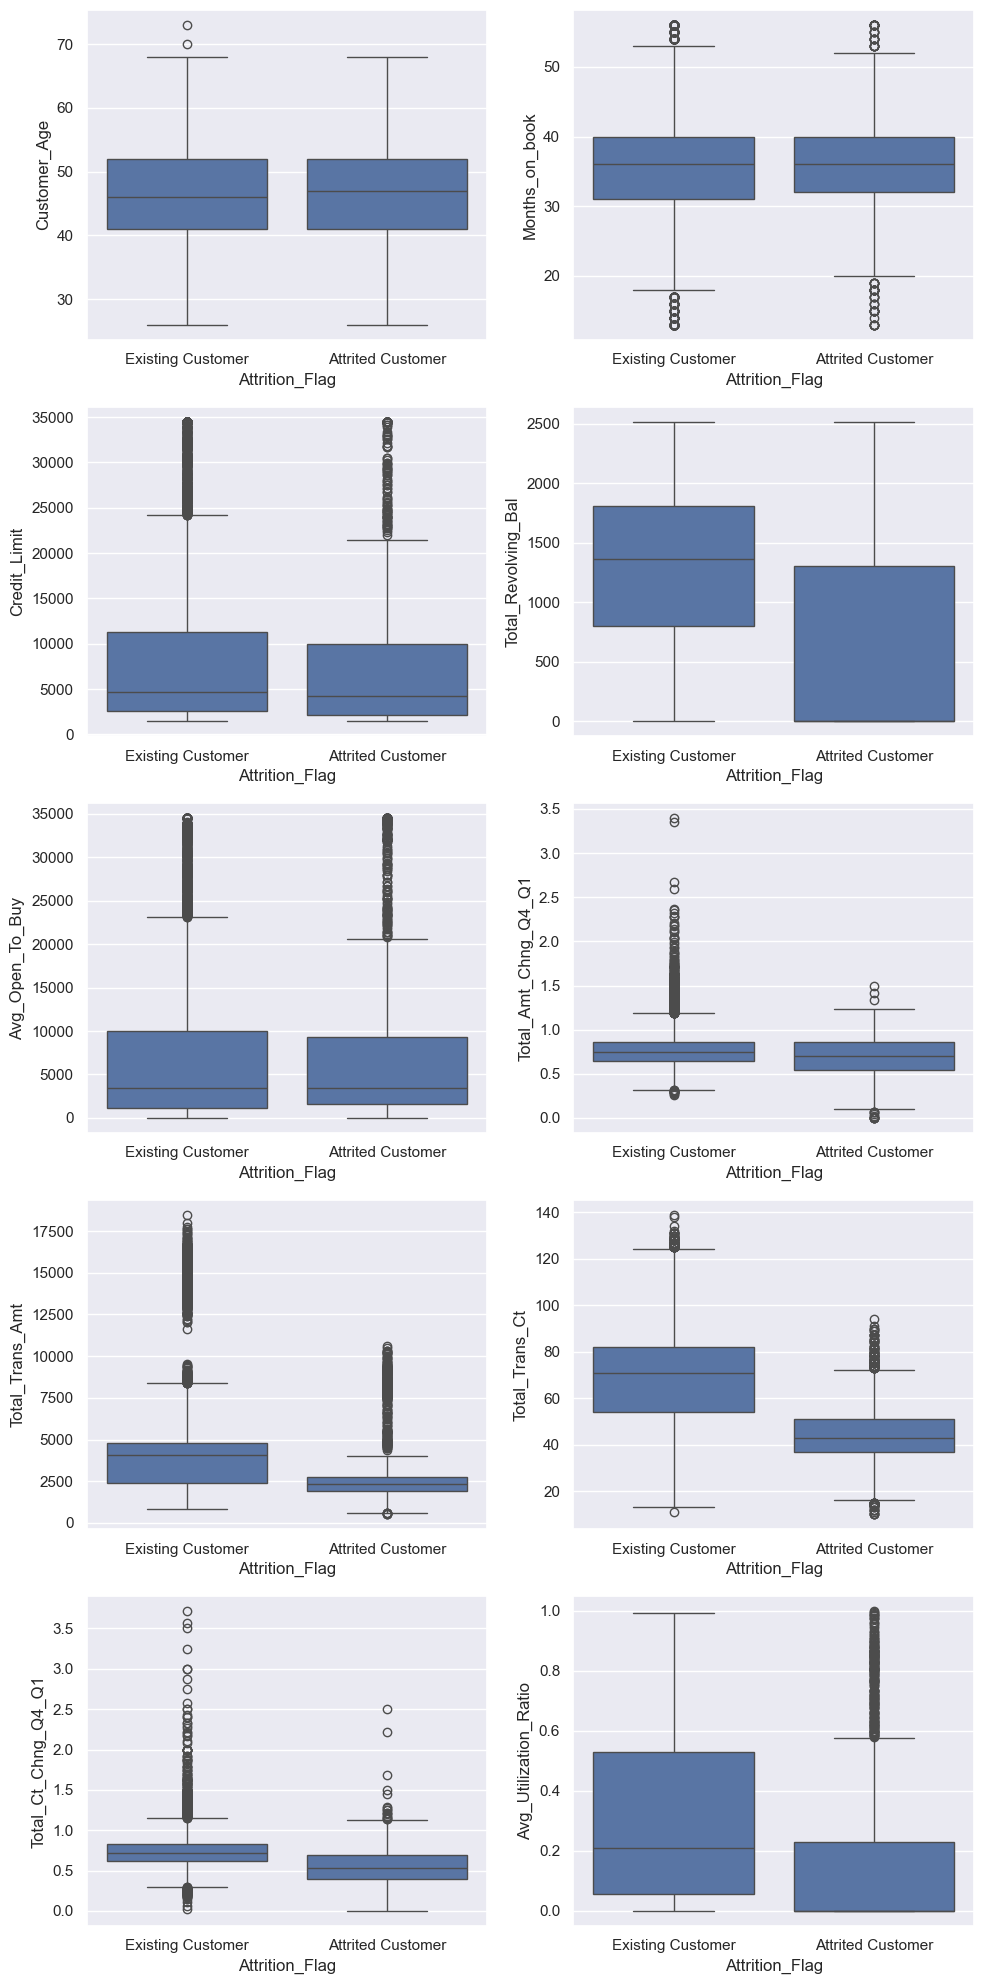

In [15]:
fig, axes = plt.subplots(5,2, figsize=(10,20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=data, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

In [16]:
##Data Pre-Processing
#Label Eencoding for Target Value
#Then the analysis continues by seeing how the level of correlation between all columns, 
# but the first do Label Encoder to change "Existing Customer" = 1, and "Attrited Customer" = 0

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['Attrition_Flag'] = label.fit_transform(data['Attrition_Flag'])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


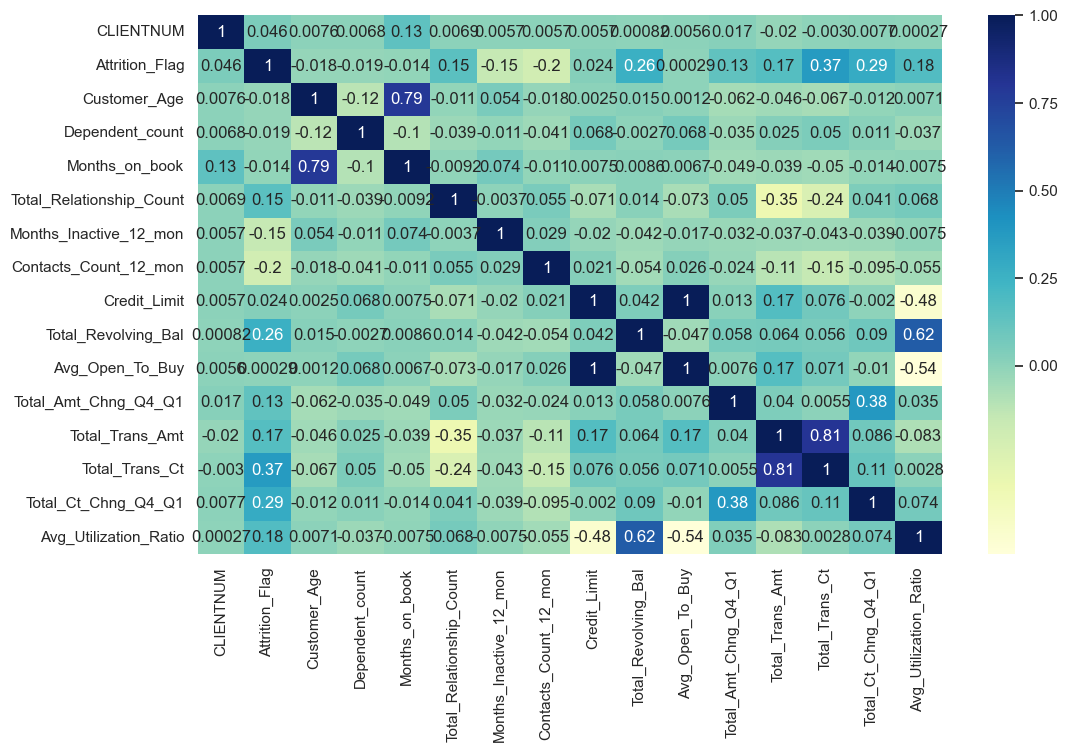

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt




# Select only numeric columns from the data
numeric_data = data.select_dtypes(include=['number'])

# Plot the heatmap using the correlation matrix of the numeric data
plt.figure(figsize=(12, 7))
ax = sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")

# Add color bar ticks if needed
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])

plt.show()


In [19]:
#One Hot Encoding for Categorical Value¶
#we can know what column that has good corelation with "attrition flag" column

In [20]:
#performing one-hot encoding
print('Before doing one-hot encoding',data.shape)
data_dumm = pd.get_dummies(data, prefix_sep='_')
print('After doing one-hot encoding',data_dumm.shape)
data_dumm.head()

Before doing one-hot encoding (10127, 21)
After doing one-hot encoding (10127, 39)


,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,False,False,True,False,False,False,True,False,False,False
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,False,False,False,False,True,False,True,False,False,False
2,713982108,1,51,3,36,4,1,0,3418.0,0,...,False,False,False,True,False,False,True,False,False,False
3,769911858,1,40,4,34,3,4,1,3313.0,2517,...,False,False,False,False,True,False,True,False,False,False
4,709106358,1,40,3,21,5,1,0,4716.0,0,...,False,False,True,False,False,False,True,False,False,False


In [21]:
#Removing Outliers Function (Standard Deviation Method)
def remove_outliers(data_dumm, columns, tresh=3):
    dataset = data_dumm.copy()
    index_to_remove = []
    value_to_remove = []
    for col in columns:
        array_to_remove = dataset[col].values
        mean, std = np.mean(array_to_remove), np.std(array_to_remove)
        z_score = np.abs((array_to_remove - mean) / std)
        threshold = tresh
        good = z_score < threshold
        for i in range(len(good)):
            if good[i] == False:
                index_to_remove.append(i)
                value_to_remove.append(array_to_remove[i])
    index_to_remove = np.unique(np.array(index_to_remove))
    print("Removed rows: ", len(index_to_remove))
    dataset = dataset.drop(dataset.index[index_to_remove])
    return dataset

In [22]:
data_after_removing_outliers = remove_outliers(data_dumm, numerical_columns)

Removed rows:  642


In [23]:
data['Gender']=data['Gender'].replace({'F':0,'M':1})
data.head()

C:\Users\yusra\AppData\Local\Temp\ipykernel_19332\2074503603.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
selected_features = ['Education_Level', 'Marital_Status','Income_Category','Card_Category']

for column in selected_features:
    unique_values = data[column].unique()
    print(f"Unique values in the colum '{column}': {unique_values}")

Unique values in the colum 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in the colum 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']
Unique values in the colum 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Unique values in the colum 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


In [25]:
#We should know how many 'Unknown' values we have.
unknown_count = data['Education_Level'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Education_level column: {unknown_count}")
unknown_count = data['Marital_Status'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Marital_Status column: {unknown_count}")
unknown_count = data['Income_Category'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' values in Income_Category column: {unknown_count}")

Number of 'Unknown' values in Education_level column: 1519
Number of 'Unknown' values in Marital_Status column: 749
Number of 'Unknown' values in Income_Category column: 1112


In [26]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

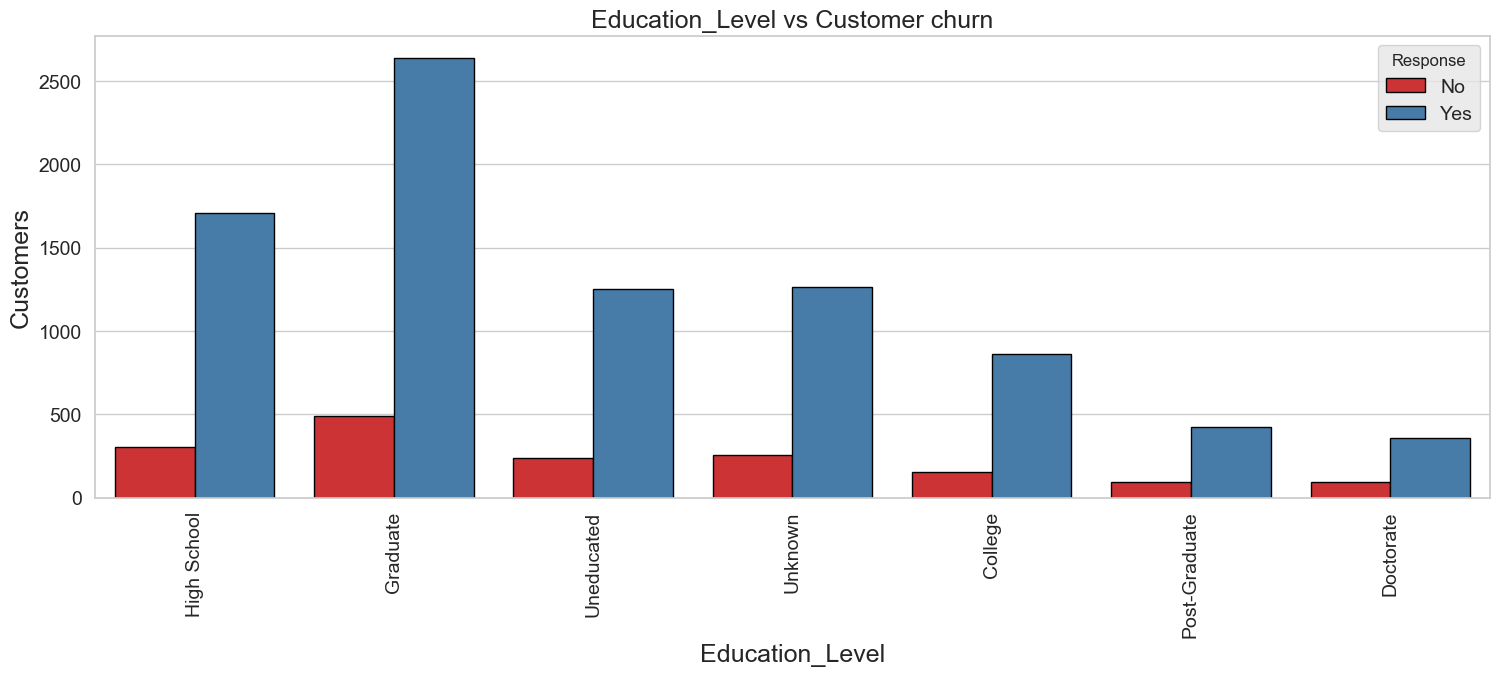

In [27]:
#Education level
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.countplot(x="Education_Level", data=data,hue='Attrition_Flag',edgecolor='black')
plt.xlabel("Education_Level",fontsize=18)
plt.ylabel("Customers",fontsize=18)
plt.title("Education_Level vs Customer churn",fontsize=18)
legend = plt.legend(title="Response", labels=["No", "Yes"], fontsize=14)
legend.get_frame().set_facecolor('0.9')
legend.get_frame().set_alpha(0.8)
#plt.legend(title="Response", labels=["No", "Yes"],fontsize=16)
plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [28]:
# Calculate the percentages of "Yes" and "No" responses for each education level
education_percents = data.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).unstack()
education_percents.reset_index(inplace=True)
education_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

# Create a DataFrame with the percentages of "No" and "Yes" responses for each Education_Level value
education_percent_table = education_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format the percentages as percentage notation
education_percent_table['No_Percentage'] = education_percent_table['No_Percentage'].apply(lambda x: f"{x:.2%}")
education_percent_table['Yes_Percentage'] = education_percent_table['Yes_Percentage'].apply(lambda x: f"{x:.2%}")

# Sort the table in descending order based on the "Yes_Percentage" value
education_percent_table = education_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Print the percentage table without the index column
print(education_percent_table[['Education_Level', 'No_Percentage', 'Yes_Percentage']].to_string(index=False))

Education_Level No_Percentage Yes_Percentage
        College        15.20%         84.80%
    High School        15.20%         84.80%
       Graduate        15.57%         84.43%
     Uneducated        15.94%         84.06%
        Unknown        16.85%         83.15%
  Post-Graduate        17.83%         82.17%
      Doctorate        21.06%         78.94%


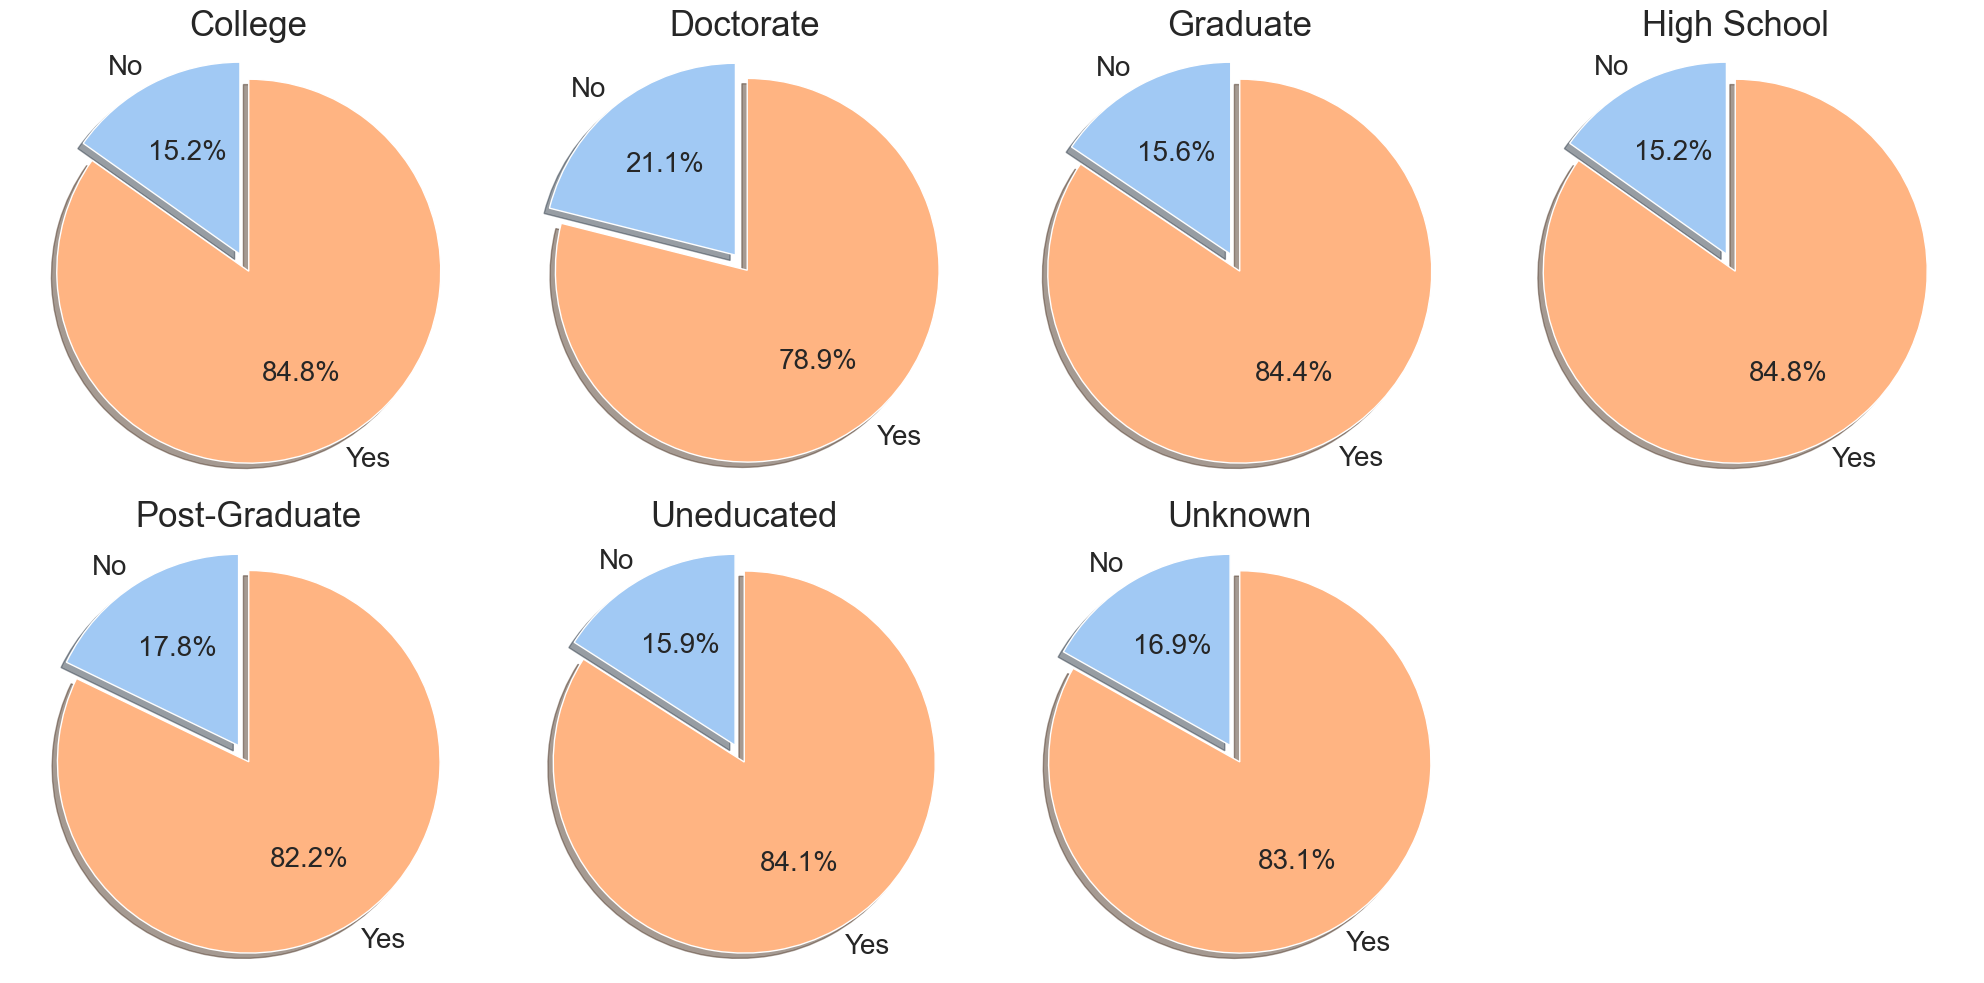

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentages of "Yes" and "No" responses for each education level
education_percents = data.groupby('Education_Level')['Attrition_Flag'].value_counts(normalize=True).unstack()
education_percents.reset_index(inplace=True)
education_percents.fillna(0, inplace=True)  # Fill with 0 for missing values

# Create a DataFrame with the percentages of response 0 and 1 for each Education_Level value
education_percent_table = education_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

# Format percentages as percentage notation
education_percent_table['No_Percentage'] = education_percent_table['No_Percentage'].apply(lambda x: x * 100)
education_percent_table['Yes_Percentage'] = education_percent_table['Yes_Percentage'].apply(lambda x: x * 100)

# Sort the table in descending order of "Yes_Percentage"
education_percent_table = education_percent_table.sort_values(by='Yes_Percentage', ascending=False)

# Use the "pastel" color palette from Seaborn
custom_palette = sns.color_palette("pastel")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the array of subplots for iteration
axes = axes.flatten()

# Create donut charts for each education level in descending order of Yes_Percentage
for index, row in education_percent_table.iterrows():
    labels = ['No', 'Yes']
    sizes = [row['No_Percentage'], row['Yes_Percentage']]
    explode = (0.1, 0)  # Explode the first slice (No)

    ax = axes[index]
    patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=custom_palette,
                                       autopct='%1.1f%%', shadow=True, startangle=90,
                                       textprops={'fontsize': 18})
    for text in texts:
        text.set_fontsize(20)
    for autotext in autotexts:
        autotext.set_fontsize(20)

    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    ax.set_title(row['Education_Level'], fontsize=25)

# Remove unused subplots
for i in range(len(education_percent_table), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [30]:
#We can observe that people with higher levels of education tend to leave the bank more frequently.


In [31]:

import pandas as pd

df1 = data.copy()
df1 = pd.concat([df1,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
df1 = pd.concat([df1,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
df1.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,768805383,1,45,1,3,39,5,1,3,12691.0,...,False,True,False,False,False,True,False,True,False,False
1,818770008,1,49,0,5,44,6,1,2,8256.0,...,False,False,False,True,False,False,True,True,False,False
2,713982108,1,51,1,3,36,4,1,0,3418.0,...,False,False,True,False,False,True,False,True,False,False
3,769911858,1,40,0,4,34,3,4,1,3313.0,...,False,False,False,True,False,False,False,True,False,False
4,709106358,1,40,1,3,21,5,1,0,4716.0,...,False,True,False,False,False,True,False,True,False,False


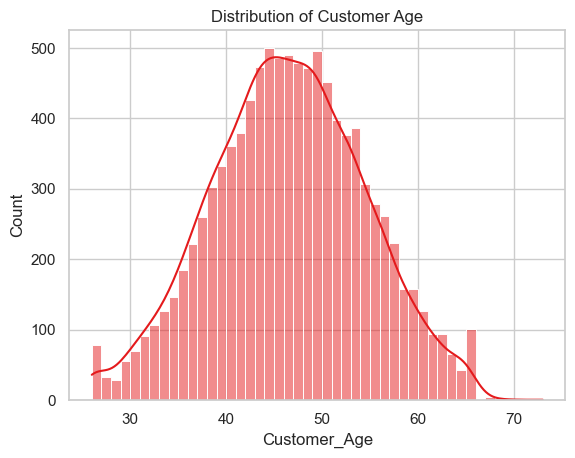

In [ ]:
# Distribution of Customer Age
sns.histplot(data['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.show()

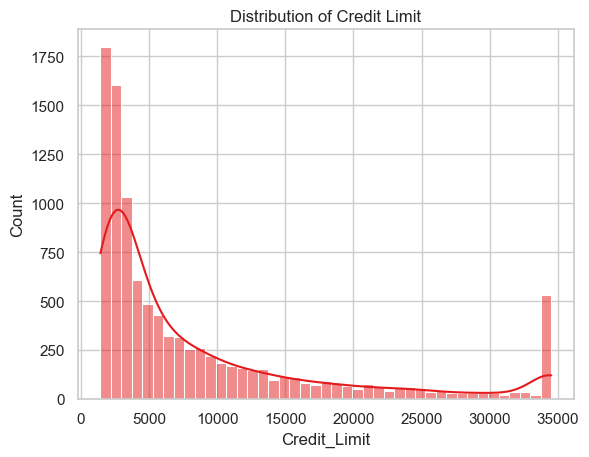

In [33]:
# Distribution of Credit Limit
sns.histplot(data['Credit_Limit'], kde=True)
plt.title('Distribution of Credit Limit')
plt.show()

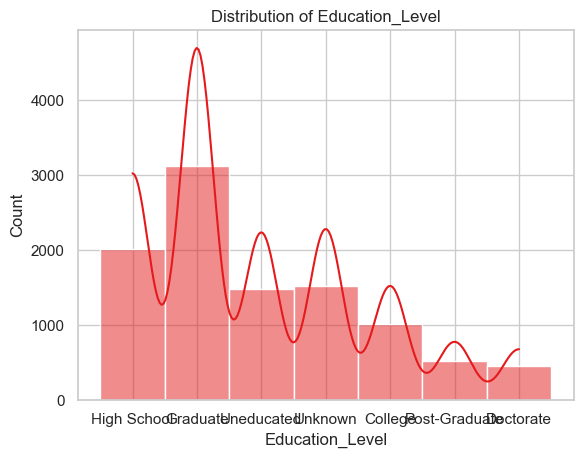

In [34]:
# Distribution of Education_Level
sns.histplot(data['Education_Level'], kde=True)
plt.title('Distribution of Education_Level')
plt.show()

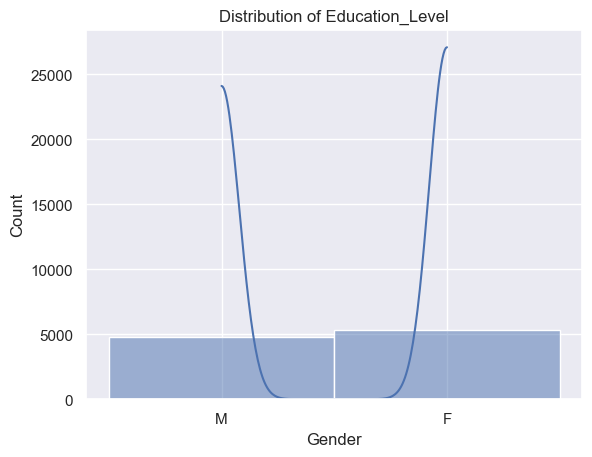

In [ ]:
# Distribution of Gender
sns.histplot(cc['Gender'], kde=True)
plt.title('Distribution of Gender')
plt.show()